In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# # !pip install category_encoders

In [14]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
# Load the dataset
crime_df=pd.read_csv("Mar424_converted_77_Features", na_values=['NULL', '?', 'NONE', ' '])

print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (2883802, 77)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

# Prepare for Data Training

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import scale

In [17]:
# Drop all the weather
crime_df=crime_df.drop(['Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure','Total_Precipitation'], axis =1)

In [18]:
print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (2883802, 71)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Crime_Category', 'Crime_Category_Code', 'Weapon_Reported',
       'Vict_Sex_M', 'Vict_Sex_X', 'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5',
       'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12',
       'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18',
       'AREA_19', 'AREA_20', 'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
 

In [19]:
# Selecting predictor and target variables
X = crime_df.drop(['Date_Rptd','Rpt_Dist_No','DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Crm_Cd_Desc', 'Crm_Cd', 'Crime_Category_Code','Crime_Category'], axis=1)
y = crime_df['Crime_Category']

In [20]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Logistic Regression without weather: lr_wo_weather

In [22]:
logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train_scaled, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression
Accuracy: 0.7277780571155124
Confusion Matrix:
[[134120   1485     24   5252      1    503   2146      0]
 [    57  21836     83      1      6    165  19412     28]
 [  7975   2901    171    173      6  23465   8011     20]
 [ 16433    192      3   8644      0    624    446      2]
 [  5204   3077     36    454      0    270   4264     19]
 [  6674   1985   1248   2440      1 220908   3264      7]
 [  4247  15077     54     67      5    878  34020     32]
 [   888   5837     31      0      3      0  11531     55]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.76      0.93      0.84    143531
        Fraud and Financial Crimes       0.42      0.53      0.46     41588
              Miscellaneous Crimes       0.10      0.00      0.01     42722
             Robbery and Extortion       0.51      0.33      0.40     26344
                   Sexual Offenses       0.00      0.00

In [23]:
# Feature importances
feature_importances = logreg.coef_[0]
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
4                               Weapon_Reported    2.292896
27                   Region_Ethnic_Origin_Black    0.285514
28  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.236224
5                                    Vict_Sex_M    0.160278
1                                      Vict_Age    0.126360
41                                      Month_5    0.072890
43                                      Month_7    0.069633
44                                      Month_8    0.065704
45                                      Month_9    0.062974
42                                      Month_6    0.061585
46                                     Month_10    0.061284
55                                    Year_2017    0.061214
61                                    Year_2023    0.057291
47                                     Month_11    0.057207
48                                     Month_12    0.056971
39                 

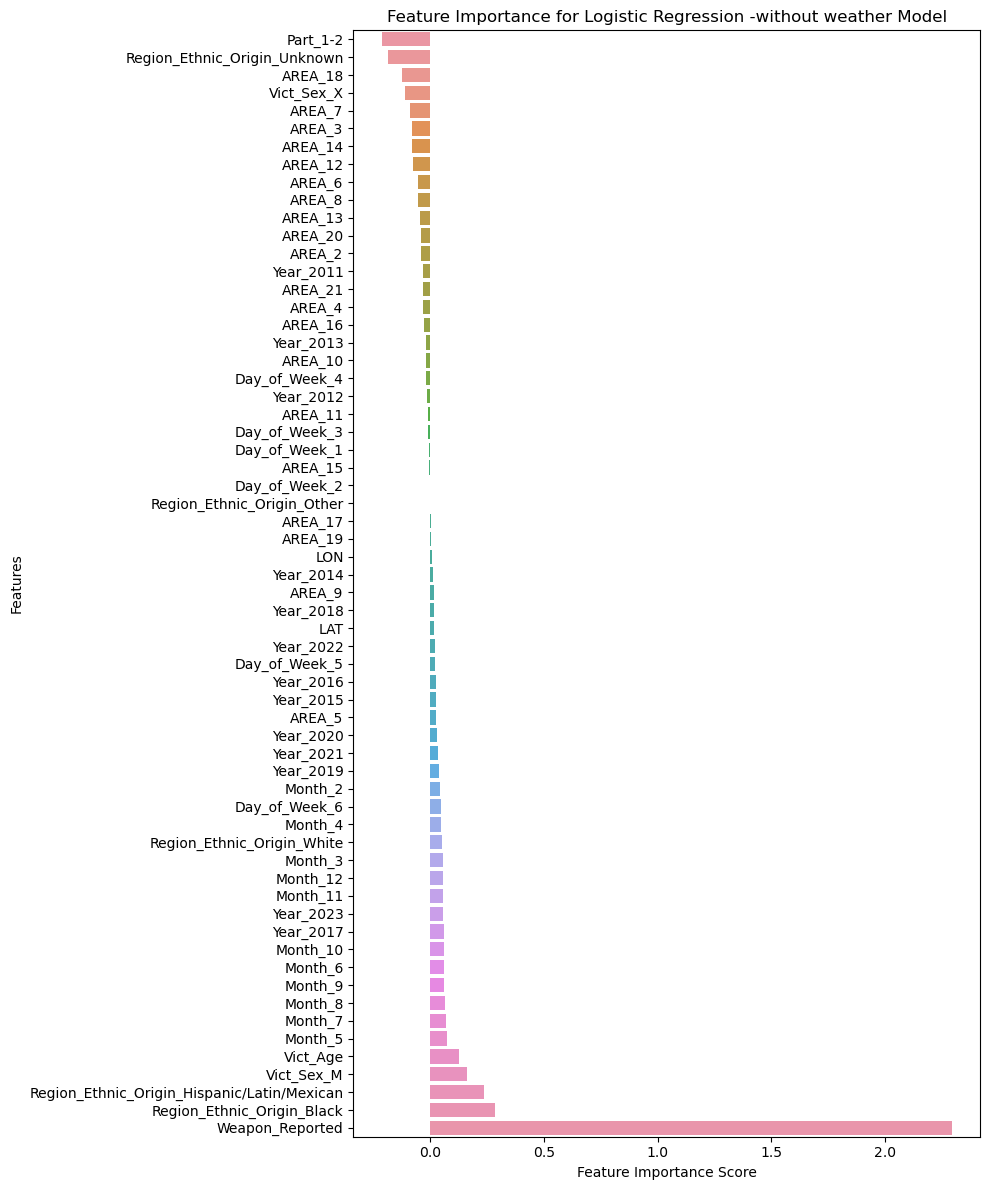

In [24]:
# Feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression -without weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# # Model XGBOOST: xgboost_wo_weather

In [25]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, train your XGBClassifier with the encoded target variable
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the scaled test set using the trained model
y_pred = xgb_model.predict(X_test_scaled)

# If you need to convert predictions back to original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("XGBoost")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate the classification report using the original string labels
# Convert encoded predictions back to original labels for interpretability
y_pred_labels = label_encoder.inverse_transform(y_pred)
class_report = classification_report(y_test, y_pred_labels)
print(f"Classification Report:\n{class_report}")


XGBoost
Accuracy: 0.747578286326572
Confusion Matrix:
[[132127   1363   1202   4852    686   1101   2185     15]
 [    54  23761    391      4    104    190  16936    148]
 [  5858   2658   3889    214    605  23569   5772    157]
 [ 14280    219     23  10101    361    992    365      3]
 [  3847   2882    491    473   2135    316   3133     47]
 [  4551   2081     31   2577    163 224106   2967     51]
 [  3724  14677    545     76     69    915  34003    371]
 [   854   5570    291      4     97     19  10458   1052]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.80      0.92      0.86    143531
        Fraud and Financial Crimes       0.45      0.57      0.50     41588
              Miscellaneous Crimes       0.57      0.09      0.16     42722
             Robbery and Extortion       0.55      0.38      0.45     26344
                   Sexual Offenses       0.51      0.16      0.24   

In [26]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
0                                      Part_1-2    0.413165
4                               Weapon_Reported    0.403794
29                   Region_Ethnic_Origin_Other    0.020748
6                                    Vict_Sex_X    0.017334
19                                      AREA_14    0.015028
5                                    Vict_Sex_M    0.009544
30                 Region_Ethnic_Origin_Unknown    0.008006
1                                      Vict_Age    0.007117
10                                       AREA_5    0.006710
27                   Region_Ethnic_Origin_Black    0.006521
28  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.005489
57                                    Year_2019    0.003853
61                                    Year_2023    0.003789
37                                Day_of_Week_6    0.003786
26                                      AREA_21    0.003705
12                 

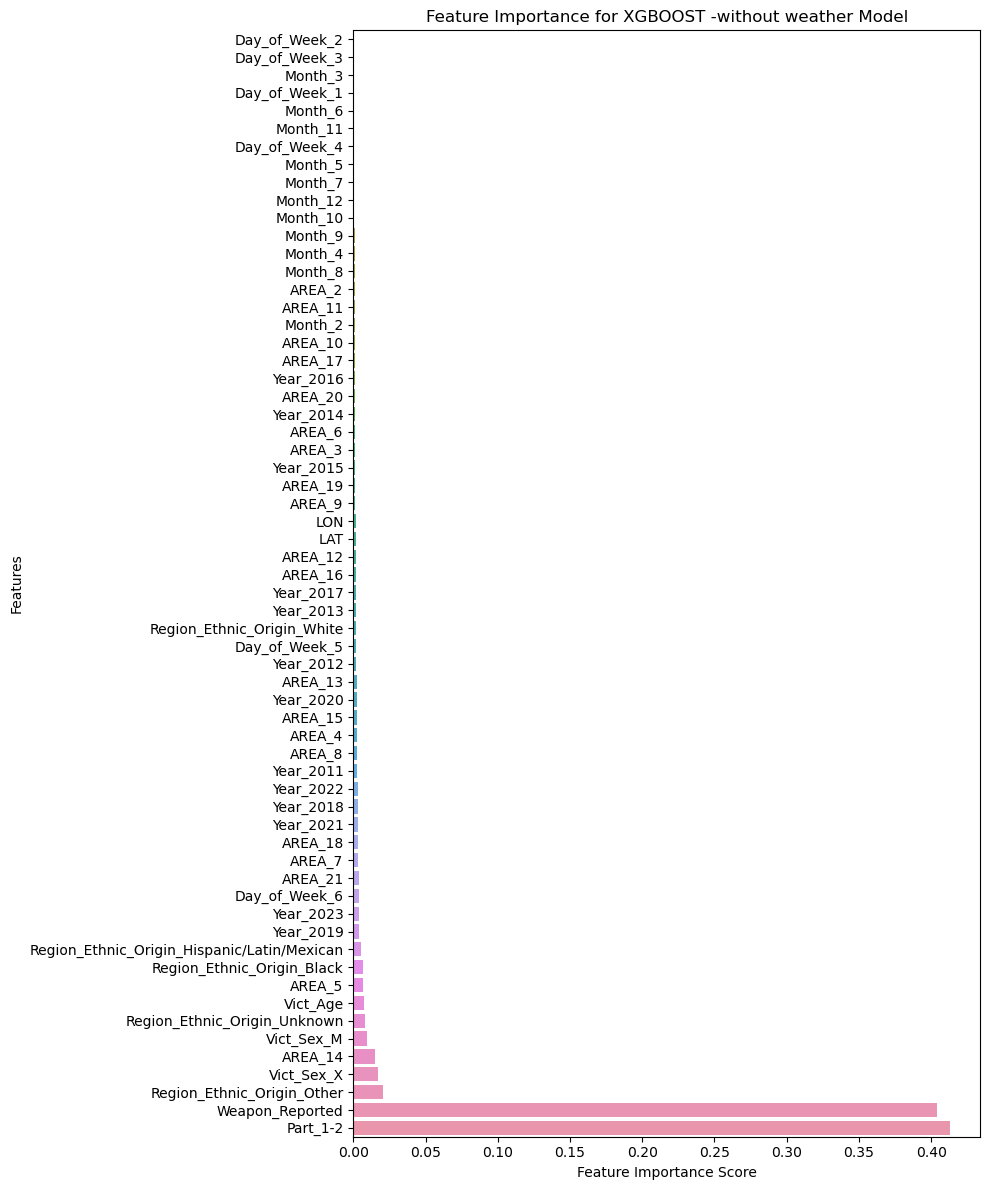

In [27]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for XGBOOST -without weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# # Model Random Forest: rf_wo_weather

In [28]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of the random forest classifier:", accuracy_rf)

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy of the random forest classifier: 0.7858749117918861
Confusion Matrix:
[[133071   1133    872   5052    548   1070   1635    150]
 [   195  25941    558     11    278    366  13236   1003]
 [  4733   2059  11805    183    394  19230   3865    453]
 [ 11286    175     42  13169    274   1145    237     16]
 [  3199   2050    635    538   3941    383   2330    248]
 [  3478   1678   1725   2003    186 224991   2266    200]
 [  3217  12339   1068     69    328    930  34507   1922]
 [   812   4141    493      3    183    102   6774   5837]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.83      0.93      0.88    143531
        Fraud and Financial Crimes       0.52      0.62      0.57     41588
              Miscellaneous Crimes       0.69      0.28      0.39     42722
             Robbery and Extortion       0.63      0.50      0.56     26344
                   Sexual Offenses       0.

In [29]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
                                        Feature  Importance
4                               Weapon_Reported    0.229736
0                                      Part_1-2    0.201224
2                                           LAT    0.107641
3                                           LON    0.107388
1                                      Vict_Age    0.097481
6                                    Vict_Sex_X    0.012488
29                   Region_Ethnic_Origin_Other    0.010396
33                                Day_of_Week_2    0.008853
35                                Day_of_Week_4    0.008790
34                                Day_of_Week_3    0.008732
32                                Day_of_Week_1    0.008697
5                                    Vict_Sex_M    0.007968
28  Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.007419
44                                      Month_8    0.007343
43                                      Month_7    0.007276
42                 

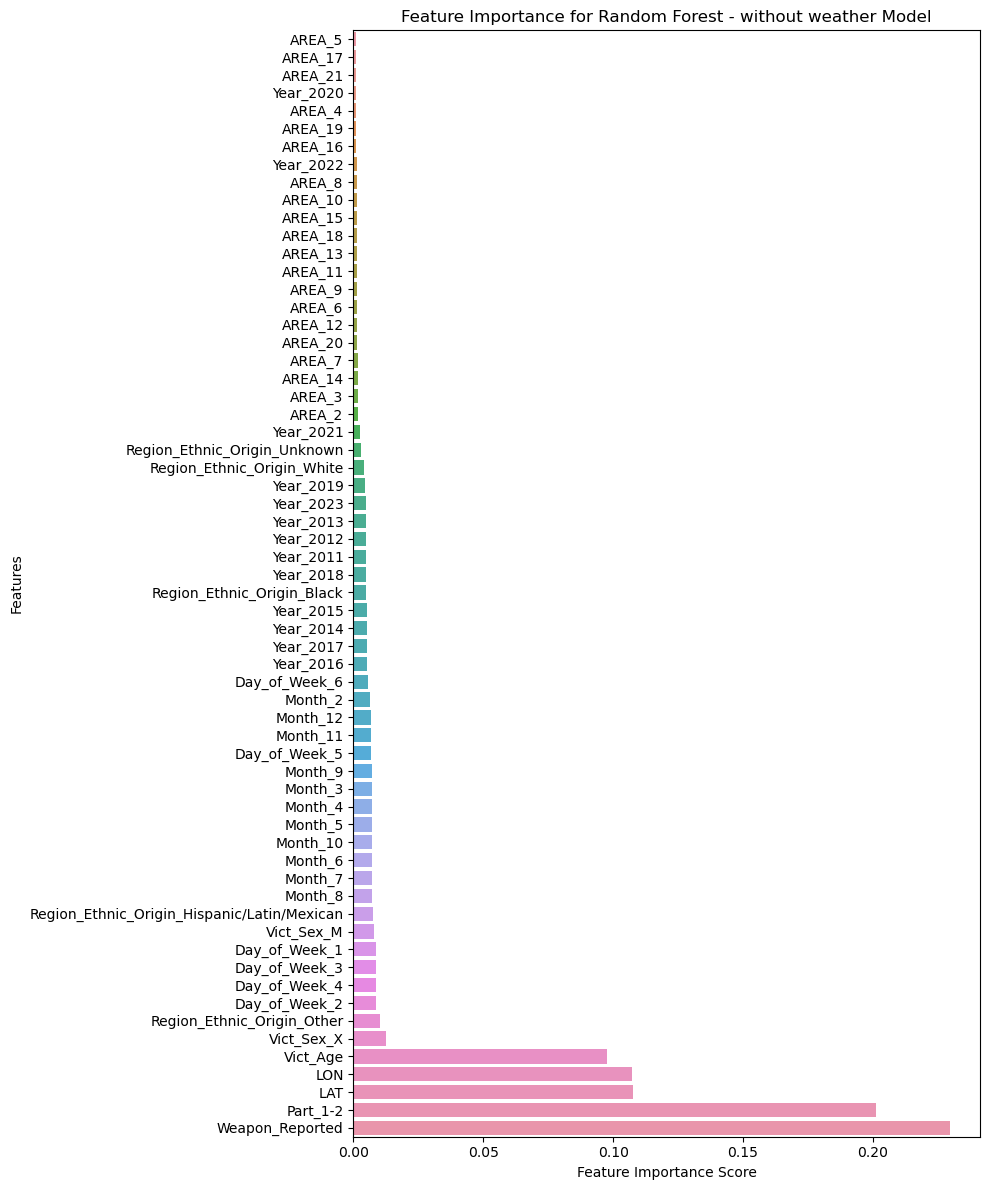

In [30]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Forest - without weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

# Model KNN: knn_wo_weather

In [10]:
# Training the model and predicting on test data
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

KNN
Accuracy: 0.6767378515537632
Confusion Matrix:
[[126412   2239    953   4039    352   7316   1998    222]
 [  3206  18443   1277     31    610   8532   8452   1037]
 [  7766   3049   2787    251    253  25345   2866    405]
 [ 14396    219    183   5219     98   5982    219     28]
 [  5039   2424    428    339    665   2429   1703    297]
 [  6870   2791   3727   1368    237 219134   2090    310]
 [  7695  12338   2037    135    720  13890  15901   1664]
 [  2431   4568    725     24    304   4230   4308   1755]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.73      0.88      0.80    143531
        Fraud and Financial Crimes       0.40      0.44      0.42     41588
              Miscellaneous Crimes       0.23      0.07      0.10     42722
             Robbery and Extortion       0.46      0.20      0.28     26344
                   Sexual Offenses       0.21      0.05      0.08     1

In [ ]:
# Take too long ?

# from sklearn.inspection import permutation_importance

# # Calculating permutation feature importance
# perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# # Map the importances to the feature names and sort them
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': perm_importance.importances_mean
# }).sort_values(by='Importance', ascending=False)

# # Plotting the feature importances
# plt.figure(figsize=(10, 12))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.xlabel('Permutation Importance')
# plt.ylabel('Features')
# plt.title('Permutation Feature Importance for KNN Model')
# plt.tight_layout()  # Adjust the layout to fit all the labels
# plt.show()

In [20]:
# X columns
print('Shape of X:', X.shape)
print(X.columns)

Shape of X: (2883802, 62)
Index(['Part_1-2', 'Vict_Age', 'LAT', 'LON', 'Weapon_Reported', 'Vict_Sex_M',
       'Vict_Sex_X', 'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6',
       'AREA_7', 'AREA_8', 'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12',
       'AREA_13', 'AREA_14', 'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18',
       'AREA_19', 'AREA_20', 'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Year_2023'],
      dtype='o